# 3-Factor Factorial Experiments
## Problema 14-13

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

In [2]:
df = pd.read_excel('problem 14-13.xlsx')
df.head()

,Hardwood,Freeness,Time,Strength
0,10,350,1.5,96.6
1,10,350,1.5,96.0
2,15,350,1.5,98.5
3,15,350,1.5,97.2
4,20,350,1.5,97.5


In [3]:
res = smf.ols('Strength~C(Hardwood)*C(Freeness)*C(Time)', data=df).fit()
anova_lm(res)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
C(Hardwood),2.0,8.375000,4.187500,7.552605,0.004153
C(Freeness),2.0,21.851667,10.925833,19.705912,0.000029
C(Time),1.0,17.361111,17.361111,31.312625,0.000026
C(Hardwood):C(Freeness),4.0,6.513333,1.628333,2.936874,0.049523
C(Hardwood):C(Time),2.0,3.203889,1.601944,2.889279,0.081617
C(Freeness):C(Time),2.0,1.050556,0.525278,0.947395,0.406255
C(Hardwood):C(Freeness):C(Time),4.0,2.084444,0.521111,0.939880,0.463444
Residual,18.0,9.980000,0.554444,NaN,NaN


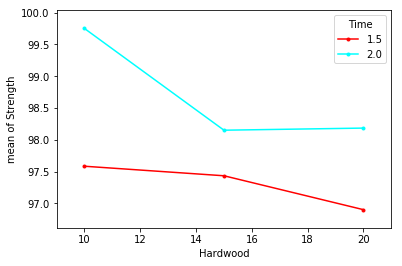

In [4]:
interaction_plot(df['Hardwood'], df['Time'], df['Strength']);

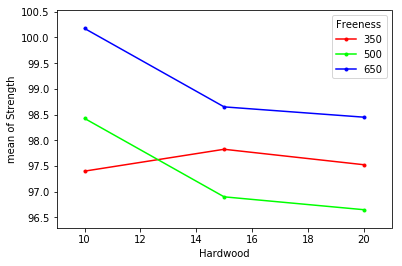

In [5]:
interaction_plot(df['Hardwood'], df['Freeness'], df['Strength']);

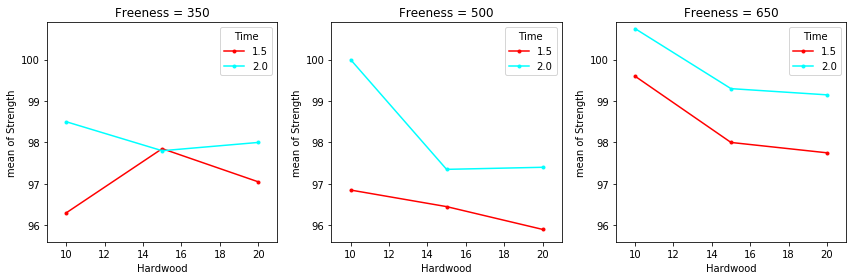

In [6]:
fig = plt.figure(figsize=(12, 4))

y_min, y_max = df.Strength.min(), df.Strength.max()

ax = fig.add_subplot(131)
df2 = df[df['Freeness']==350]
interaction_plot(list(df2['Hardwood']), df2['Time'], df2['Strength'],ax=ax)
ax.set_ylim(y_min, y_max)
ax.set_title('Freeness = 350')
ax.set_xlabel('Hardwood')

ax = fig.add_subplot(132)
df2 = df[df['Freeness']==500]
interaction_plot(list(df2['Hardwood']), df2['Time'], df2['Strength'],ax=ax)
ax.set_ylim(y_min, y_max)
ax.set_title('Freeness = 500')
ax.set_xlabel('Hardwood')

ax = fig.add_subplot(133)
df2 = df[df['Freeness']==650]
interaction_plot(list(df2['Hardwood']), df2['Time'], df2['Strength'],ax=ax)
ax.set_ylim(y_min, y_max)
ax.set_title('Freeness = 650')
ax.set_xlabel('Hardwood')

plt.tight_layout()